load data

In [1]:
import pandas as pd
from pathlib import Path

RAW = Path("../data/raw/Coffe_sales.csv")

df = pd.read_csv(RAW)

/var/folders/w0/b73d3zsd6q90kp8_65qcbrc40000gn/T/ipykernel_4728/625192171.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="coffee_name", palette=palette, order=coffee_names)       # count of each product


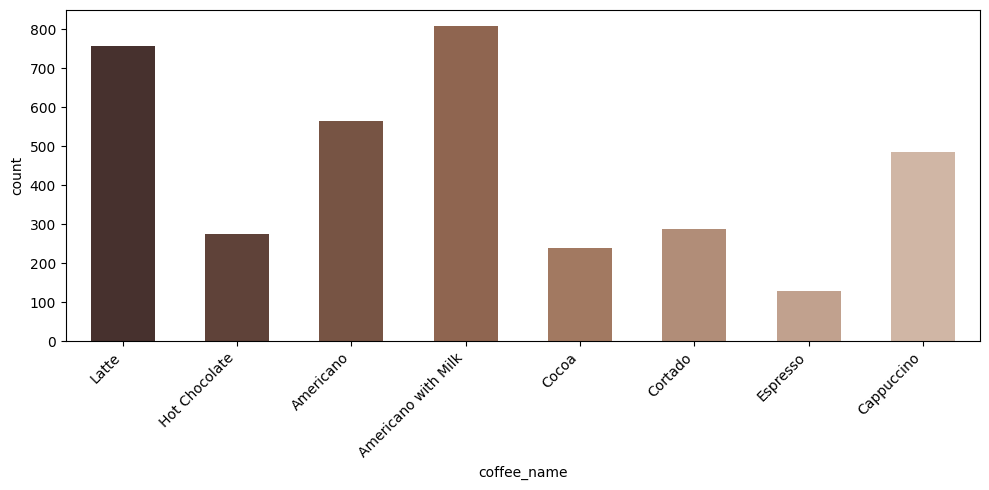

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make the countplot bars thinner: set a smaller bar width via matplotlib's bar container
plt.figure(figsize=(10,5))
# Create a brown palette with as many colors as unique coffee names
coffee_names = df['coffee_name'].unique()
n_colors = len(coffee_names)
# Define start and end brown RGB and interpolate
import matplotlib as mpl
brown_cmap = mpl.colors.LinearSegmentedColormap.from_list('browns',['#4b2e2a','#a66b4a','#d7b49e'])
palette = [mpl.colors.rgb2hex(brown_cmap(i/(n_colors-1))) for i in range(n_colors)] if n_colors>1 else ['#4b2e2a']
ax = sns.countplot(data=df, x="coffee_name", palette=palette, order=coffee_names)       # count of each product
# Reduce bar width by iterating patches (matplotlib bars) and setting a smaller width
for p in ax.patches:
    # get current width and x, then shrink width towards center
    current_width = p.get_width()
    diff = current_width * 0.3  # shrink to 70% of original width
    p.set_width(current_width - diff)
    p.set_x(p.get_x() + diff * 0.5)
# Rotate x labels if names overlap
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


<Axes: xlabel='Amount Spent ($)', ylabel='Number of Sales'>

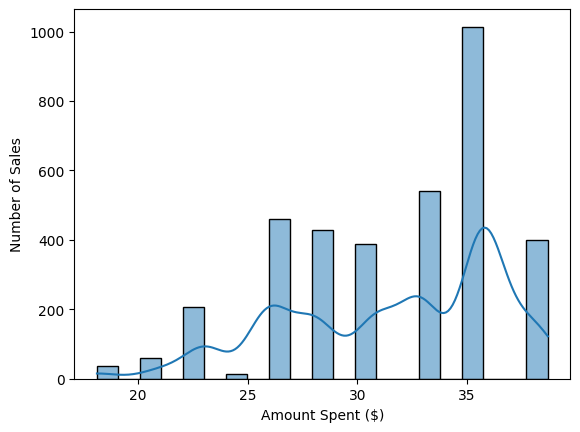

In [3]:
plt.ylabel("Number of Sales")
plt.xlabel("Amount Spent ($)")
sns.histplot(df["money"], kde=True)       # sales distribution


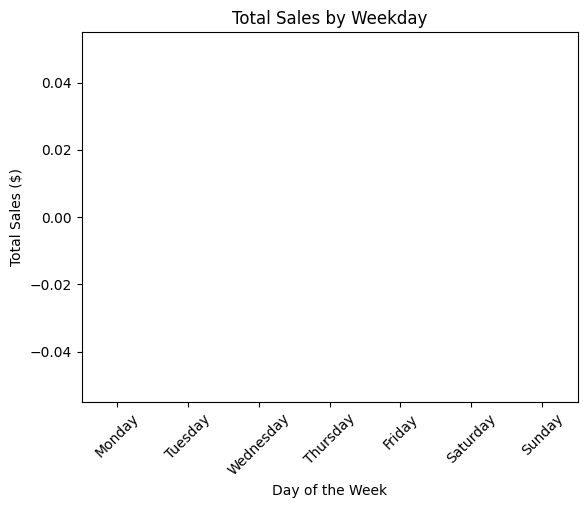

In [4]:
weekday_sales = df.groupby('Weekday')['money'].sum().reset_index()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.barplot(data=weekday_sales, x='Weekday', y='money', order=order)
plt.title("Total Sales by Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

In [5]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [6]:
print(df.shape)      # number of rows and columns
print(df.info())     # data types and missing values
print(df.columns)    #

(3547, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB
None
Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')


In [7]:
df.tail()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000
3546,18,card,35.76,Latte,Night,Sun,Mar,7,3,2025-03-23,18:11:38.635000


In [8]:
print(df.isnull().sum())
print(df.duplicated().sum())

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64
0


In [9]:
df.describe()        # numeric summary

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [10]:
df.describe(include='object')  # categorical summary

,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Date,Time
count,3547,3547,3547,3547,3547,3547,3547
unique,1,8,3,7,12,381,3547
top,card,Americano with Milk,Afternoon,Tue,Mar,2024-10-11,10:15:50.520000
freq,3547,809,1205,572,494,26,1


In [11]:
df['coffee_name'].unique()

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

In [12]:
df['Time_of_Day'].unique()

array(['Morning', 'Afternoon', 'Night'], dtype=object)

In [13]:
df.columns

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

In [14]:
df['hour_of_day'].unique()

array([10, 12, 13, 15, 16, 18, 19, 11, 14, 17,  9, 20,  8, 22,  7, 21,  6])

In [15]:
df['money'].unique()

array([38.7 , 28.9 , 33.8 , 24.  , 32.82, 37.72, 27.92, 23.02, 18.12,
       35.76, 30.86, 25.96, 21.06])

Questions: 

What is our most profitable day?
What is our most profitable hour?



What is our most profitable drink?

In [16]:
df.groupby('coffee_name')['money'].sum().reset_index().sort_values(by='money', ascending=False)

,coffee_name,money
7,Latte,26875.30
1,Americano with Milk,24751.12
2,Cappuccino,17439.14
0,Americano,14650.26
6,Hot Chocolate,9933.46
3,Cocoa,8521.16
4,Cortado,7384.86
5,Espresso,2690.28


Plot of coffee_name orders seperated by name

Visualize coffee name -> money and observe relationship

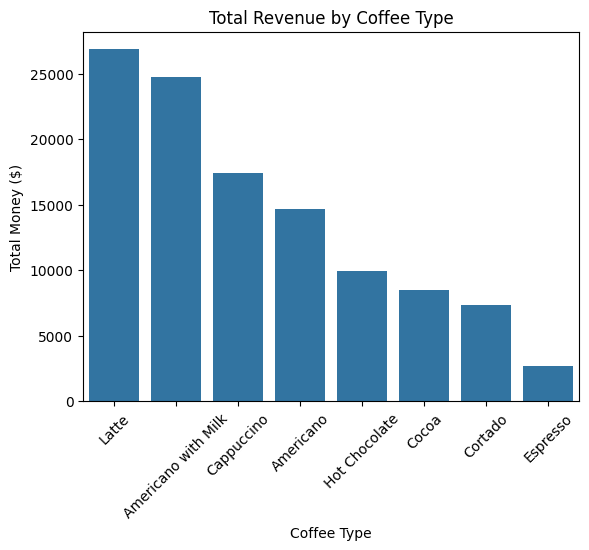

In [28]:
df_sorted = df.groupby('coffee_name')['money'].sum().reset_index().sort_values('money', ascending=False)
sns.barplot(data=df_sorted, x='coffee_name', y='money', estimator=sum)
plt.title("Total Revenue by Coffee Type")
plt.ylabel("Total Money ($)")
plt.xlabel("Coffee Type")
plt.xticks(rotation=45)
plt.show()

In [25]:
df.groupby('coffee_name')['money'].mean().reset_index().sort_values(by='money', ascending=False)
df.groupby('coffee_name')['money'].sum().reset_index().sort_values(by='money', ascending=False)

,coffee_name,money
7,Latte,26875.30
1,Americano with Milk,24751.12
2,Cappuccino,17439.14
0,Americano,14650.26
6,Hot Chocolate,9933.46
3,Cocoa,8521.16
4,Cortado,7384.86
5,Espresso,2690.28


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Latte'),
  Text(1, 0, 'Hot Chocolate'),
  Text(2, 0, 'Americano'),
  Text(3, 0, 'Americano with Milk'),
  Text(4, 0, 'Cocoa'),
  Text(5, 0, 'Cortado'),
  Text(6, 0, 'Espresso'),
  Text(7, 0, 'Cappuccino')])

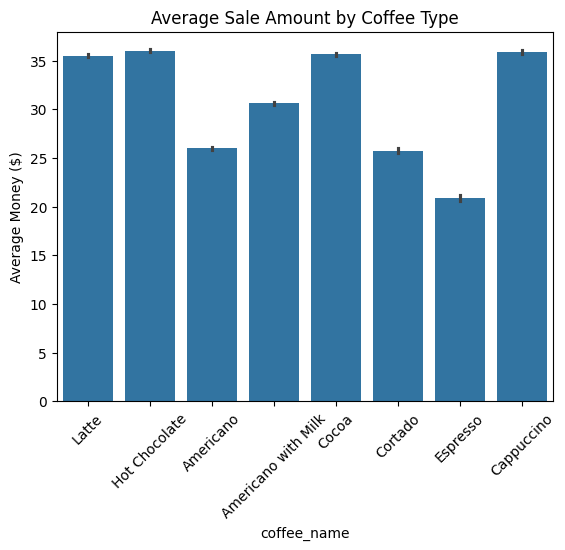

In [27]:
sns.barplot(data=df, x='coffee_name', y='money', estimator='mean')
plt.title("Average Sale Amount by Coffee Type")
plt.ylabel("Average Money ($)")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Latte'),
  Text(1, 0, 'Hot Chocolate'),
  Text(2, 0, 'Americano'),
  Text(3, 0, 'Americano with Milk'),
  Text(4, 0, 'Cocoa'),
  Text(5, 0, 'Cortado'),
  Text(6, 0, 'Espresso'),
  Text(7, 0, 'Cappuccino')])

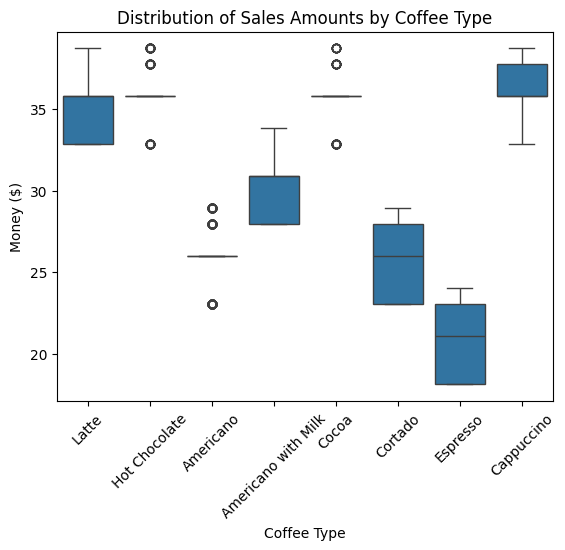

In [29]:
sns.boxplot(data=df, x='coffee_name', y='money')
plt.title("Distribution of Sales Amounts by Coffee Type")
plt.ylabel("Money ($)")
plt.xlabel("Coffee Type")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Latte'),
  Text(1, 0, 'Hot Chocolate'),
  Text(2, 0, 'Americano'),
  Text(3, 0, 'Americano with Milk'),
  Text(4, 0, 'Cocoa'),
  Text(5, 0, 'Cortado'),
  Text(6, 0, 'Espresso'),
  Text(7, 0, 'Cappuccino')])

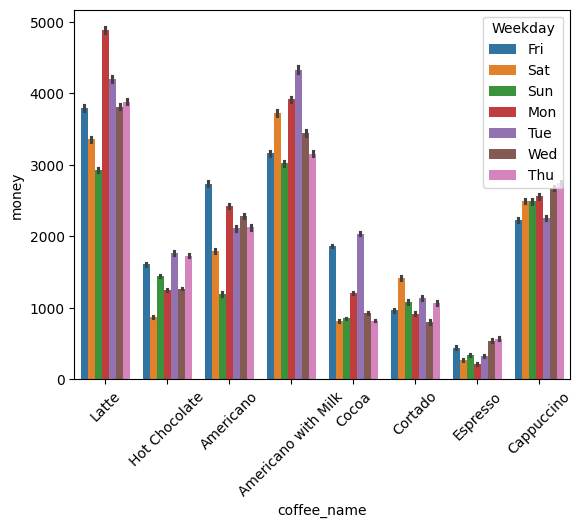

In [31]:
sns.barplot(data=df, x='coffee_name', y='money', hue='Weekday', estimator=sum)
plt.xticks(rotation=45)

Question: What is the top drink per weekday?

In [33]:
orders = df.groupby(['Weekday', 'coffee_name']).size().reset_index(name='count')
top_drink_per_day = orders.loc[orders.groupby('Weekday')['count'].idxmax()].reset_index(drop=True)
top_drink_per_day

,Weekday,coffee_name,count
0,Fri,Latte,107
1,Mon,Latte,138
2,Sat,Americano with Milk,120
3,Sun,Americano with Milk,99
4,Thu,Latte,108
5,Tue,Americano with Milk,143
6,Wed,Americano with Milk,113
